In [3]:
#TODO only standard scale the amide bonds and only one hot encode the condensation domains

In [4]:
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [5]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [6]:
clean_data = pd.read_csv("clean_data.csv")
clean_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
categorical_columns = ["AMINO ACID STARTER CONDENSATION DOMAIN"]
numerical_columns = ["# Amide bonds"]
# numerical_columns = ["# Amide bonds", "RzmA H139, H140, D144", "VibH His126", "VibH Gly131", "CdaPS1 M165", "RzmA Q36", "RzmA Y138", "RzmA R148", "HolA A149", "RzmA M143", "RzmA Q136"]

In [8]:
labels = clean_data.pop("Chain Length")

In [9]:
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [10]:
clean_data_process = preprocessor.fit_transform(clean_data) 

In [11]:
pca = SparsePCA(n_components=2)
principal_components = pca.fit_transform(clean_data_process.toarray())
principal_df = pd.DataFrame(data = principal_components, columns = ["principal component 1", "principal component 2"])

In [12]:
final_df = pd.concat([principal_df, labels], axis = 1)

In [13]:
final_df

,principal component 1,principal component 2,Chain Length
0,0.468681,-0.046051,0
1,-1.187753,-0.046051,0
2,0.744753,-0.046051,1
3,-0.911681,-0.046051,0
4,-0.083464,0.944048,1
5,0.192609,-0.046051,0
6,-0.911681,-0.046051,1
7,0.744753,-0.046051,1
8,-0.359536,-0.046051,1
9,0.744753,-0.046051,1


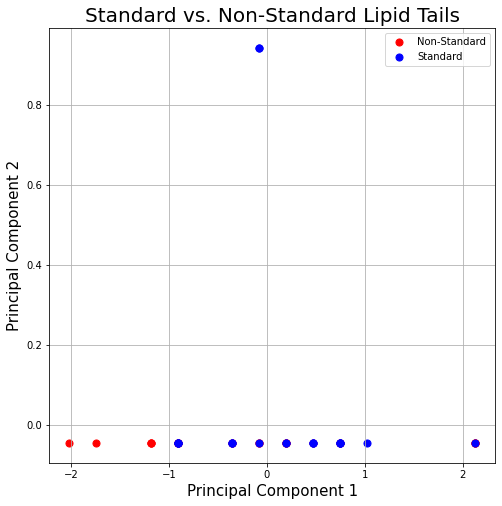

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("Standard vs. Non-Standard Lipid Tails", fontsize = 20)

targets = [0, 1]
colors = ["r", "b"]
for target, color in zip(targets, colors):
    indices_to_keep = final_df["Chain Length"] == target
    ax.scatter(final_df.loc[indices_to_keep, "principal component 1"], final_df.loc[indices_to_keep, "principal component 2"], c = color, s = 50)
ax.legend(["Non-Standard", "Standard"])
ax.grid()

In [15]:
# t-SNE Analysis

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE().fit_transform(clean_data_process)

c:\users\srisk\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\srisk\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [18]:
principal_tsne_df = pd.DataFrame(data = tsne, columns = ["principal component 1", "principal component 2"])

In [19]:
final_tsne_df = pd.concat([principal_tsne_df, labels], axis = 1)

In [20]:
final_tsne_df

,principal component 1,principal component 2,Chain Length
0,59.414532,25.362703,0
1,-151.560257,-102.354881,0
2,102.918953,19.364092,1
3,-78.607162,-161.799316,0
4,-76.187813,42.723087,1
5,31.905687,-1.052662,0
6,-37.813828,-101.737328,1
7,81.594002,95.134499,1
8,-98.589798,-6.778082,1
9,44.347870,135.768417,1


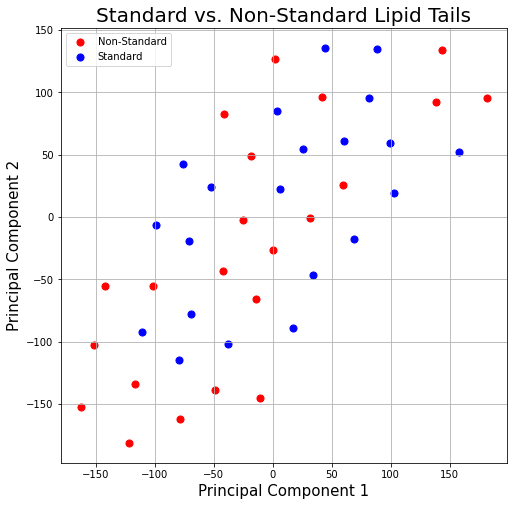

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("Standard vs. Non-Standard Lipid Tails", fontsize = 20)

targets = [0, 1]
colors = ["r", "b"]
for target, color in zip(targets, colors):
    indices_to_keep = final_tsne_df["Chain Length"] == target
    ax.scatter(final_tsne_df.loc[indices_to_keep, "principal component 1"], final_tsne_df.loc[indices_to_keep, "principal component 2"], c = color, s = 50)
ax.legend(["Non-Standard", "Standard"])
ax.grid()